Preparación de Datos

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

colors = ['crimson', 'tomato', 'darkturquoise', 'palegreen', 'gold', 'dodgerblue', 'violet', 'cornflowerblue', 'mediumvioletred']

# Cargamos el Dataset
data = pd.concat([pd.read_csv('./data/278k_song_labelled.csv'),
                  pd.read_csv('./data/278k_labelled_uri.csv')], axis=1)

# Convertimos los datos a un DataFrame
df = pd.DataFrame(data)

# Eliminamos las columnas repetidas
df = df.loc[:,~df.columns.duplicated()]

# Eliminamos Unnamed: 0.1
df = df.drop(['Unnamed: 0.1'], axis=1)

# Al no haber datos nulos, podemos continuar con la preparación de los datos
# No utilizaremos las columnas de spec_rate y labels, por lo que las eliminamos
df = df.drop(['spec_rate'], axis=1)

# Renombramos columnas para manipularlas
df = df.rename(columns={ 'Unnamed: 0': 'track index', 'uri': 'track uri', 'labels': 'mood'})

# Creamos una nueva columna que contiene la duracion la cancion en minutos y segundos para poder interpretarla de mejor manera, sin embargo seguiremos utilizando los ms para el analisis de los datos
df['duration (mm:ss)'] = pd.to_timedelta(df['duration (ms)'], unit='ms')
# utilizamos una funcion lambda para que la duracion solo muestre minutos y segundos
df['duration (mm:ss)'] = df['duration (mm:ss)'].apply(lambda x: f'{int(x.total_seconds() // 60):02d}:{int(x.total_seconds() % 60):02d}')
# utilizamos la funcion lambda para indicar que mood representa el estado de animo de la cancion
display(df)

# Hacemos un diccionario para mapear los estados de animo a valores numericos
emotions_mapping = {'sad': 0, 'happy': 1, 'energetic': 2, 'calm': 3}
# Invertimos el mapeo para poder interpretar los datos
inverted_emotions_mapping = {v: k for k, v in emotions_mapping.items()}
# Mapeamos los estados de animo a valores numericos
df['mood'] = df['mood'].map(inverted_emotions_mapping)

# indicamos el indice de la cancion
df.set_index('track index', inplace=True)

display(df)

# Para hacer los graficos necesitamos limitar a 1000 los datos
df_graphics = df.head(1000)

# Hacemos un subset para cada mood
sad = df[df['mood'] == 'sad']
happy = df[df['mood'] == 'happy']
energetic = df[df['mood'] == 'energetic']
calm = df[df['mood'] == 'calm']

print(f"Sad songs {sad.value_counts().sum()}")
print(f"Happy songs {happy.value_counts().sum()}")
print(f"Energetic songs {energetic.value_counts().sum()}")
print(f"Calm songs {calm.value_counts().sum()}")

track index  duration (ms)  danceability  energy  loudness  \
0                 0       195000.0         0.611   0.614    -8.815   
1                 1       194641.0         0.638   0.781    -6.848   
2                 2       217573.0         0.560   0.810    -8.029   
3                 3       443478.0         0.525   0.699    -4.571   
4                 4       225862.0         0.367   0.771    -5.863   
...             ...            ...           ...     ...       ...   
277933       277933       276360.0         0.777   0.725    -9.012   
277934       277934       284773.0         0.543   0.482   -12.789   
277935       277935       241307.0         0.527   0.942    -5.640   
277936       277936       234333.0         0.768   0.829    -5.109   
277937       277937       241920.0         0.779   0.870   -13.141   

        speechiness  acousticness  instrumentalness  liveness  valence  \
0            0.0672       0.01690          0.000794    0.7530    0.520   
1            0.0285       0.01180          0.009530    0.3490    0.250   
2            0.0872       0.00710          0.000008    0.2410    0.247   
3            0.0353       0.01780          0.000088    0.0888    0.199   
4            0.1060       0.36500          0.000001    0.0965    0.163   
...             ...           ...               ...       ...      ...   
277933       0.0470       0.12600          0.010800    0.0917    0.851   
277934       0.1940       0.08530          0.000092    0.1110    0.415   
277935       0.0366       0.01150          0.000000    0.1880    0.495   
277936       0.0313       0.09640          0.000029    0.0970    0.962   
277937       0.0574       0.00644          0.010700    0.0399    0.555   

          tempo  mood                             track uri duration (mm:ss)  
0       128.050     2  spotify:track:3v6sBj3swihU8pXQQHhDZo            03:15  
1       122.985     1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO            03:14  
2       170.044     1  spotify:track:2CY92qejUrhyPUASawNVRr            03:37  
3        92.011     0  spotify:track:11BPfwVbB7vok7KfjBeW4k            07:23  
4       115.917     1  spotify:track:3yUJKPsjvThlcQWTS9ttYx            03:45  
...         ...   ...                                   ...              ...  
277933  128.349     1  spotify:track:6wLr2oR8eqUG5Beleh2Crm            04:36  
277934  193.513     1  spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y            04:44  
277935  148.723     2  spotify:track:7FwBtcecmlpc1sLySPXeGE            04:01  
277936  118.773     1  spotify:track:2olVm1lHicpveMAo4AUDRB            03:54  
277937  102.689     1  spotify:track:2VNfJpwdEQBLyXajaa6LWT            04:01  

[277938 rows x 14 columns]

duration (ms)  danceability  energy  loudness  speechiness  \
track index                                                               
0                 195000.0         0.611   0.614    -8.815       0.0672   
1                 194641.0         0.638   0.781    -6.848       0.0285   
2                 217573.0         0.560   0.810    -8.029       0.0872   
3                 443478.0         0.525   0.699    -4.571       0.0353   
4                 225862.0         0.367   0.771    -5.863       0.1060   
...                    ...           ...     ...       ...          ...   
277933            276360.0         0.777   0.725    -9.012       0.0470   
277934            284773.0         0.543   0.482   -12.789       0.1940   
277935            241307.0         0.527   0.942    -5.640       0.0366   
277936            234333.0         0.768   0.829    -5.109       0.0313   
277937            241920.0         0.779   0.870   -13.141       0.0574   

             acousticness  instrumentalness  liveness  valence    tempo  \
track index                                                               
0                 0.01690          0.000794    0.7530    0.520  128.050   
1                 0.01180          0.009530    0.3490    0.250  122.985   
2                 0.00710          0.000008    0.2410    0.247  170.044   
3                 0.01780          0.000088    0.0888    0.199   92.011   
4                 0.36500          0.000001    0.0965    0.163  115.917   
...                   ...               ...       ...      ...      ...   
277933            0.12600          0.010800    0.0917    0.851  128.349   
277934            0.08530          0.000092    0.1110    0.415  193.513   
277935            0.01150          0.000000    0.1880    0.495  148.723   
277936            0.09640          0.000029    0.0970    0.962  118.773   
277937            0.00644          0.010700    0.0399    0.555  102.689   

                  mood                             track uri duration (mm:ss)  
track index                                                                    
0            energetic  spotify:track:3v6sBj3swihU8pXQQHhDZo            03:15  
1                happy  spotify:track:7KCWmFdw0TzoJbKtqRRzJO            03:14  
2                happy  spotify:track:2CY92qejUrhyPUASawNVRr            03:37  
3                  sad  spotify:track:11BPfwVbB7vok7KfjBeW4k            07:23  
4                happy  spotify:track:3yUJKPsjvThlcQWTS9ttYx            03:45  
...                ...                                   ...              ...  
277933           happy  spotify:track:6wLr2oR8eqUG5Beleh2Crm            04:36  
277934           happy  spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y            04:44  
277935       energetic  spotify:track:7FwBtcecmlpc1sLySPXeGE            04:01  
277936           happy  spotify:track:2olVm1lHicpveMAo4AUDRB            03:54  
277937           happy  spotify:track:2VNfJpwdEQBLyXajaa6LWT            04:01  

[277938 rows x 13 columns]

Sad songs 82058
Happy songs 106429
Energetic songs 47065
Calm songs 42386


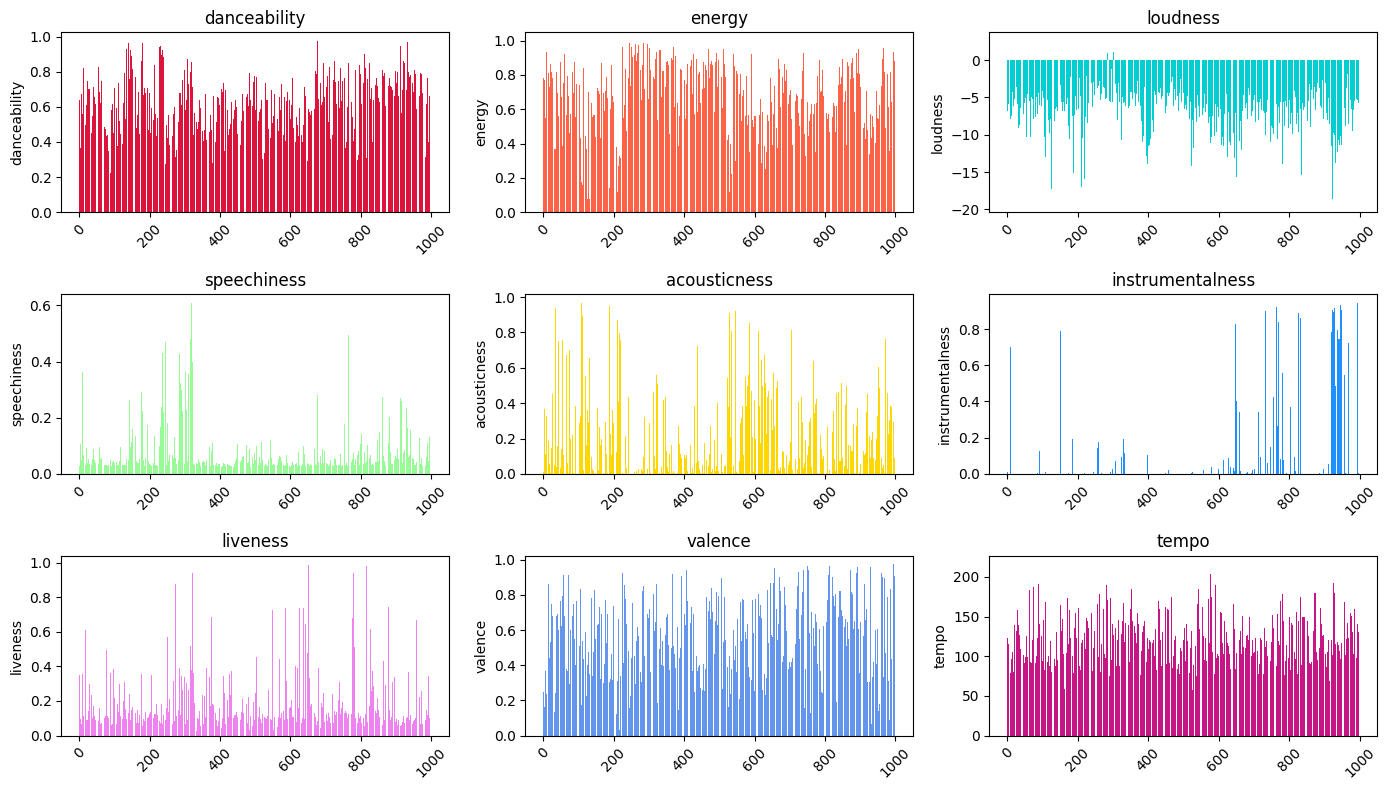

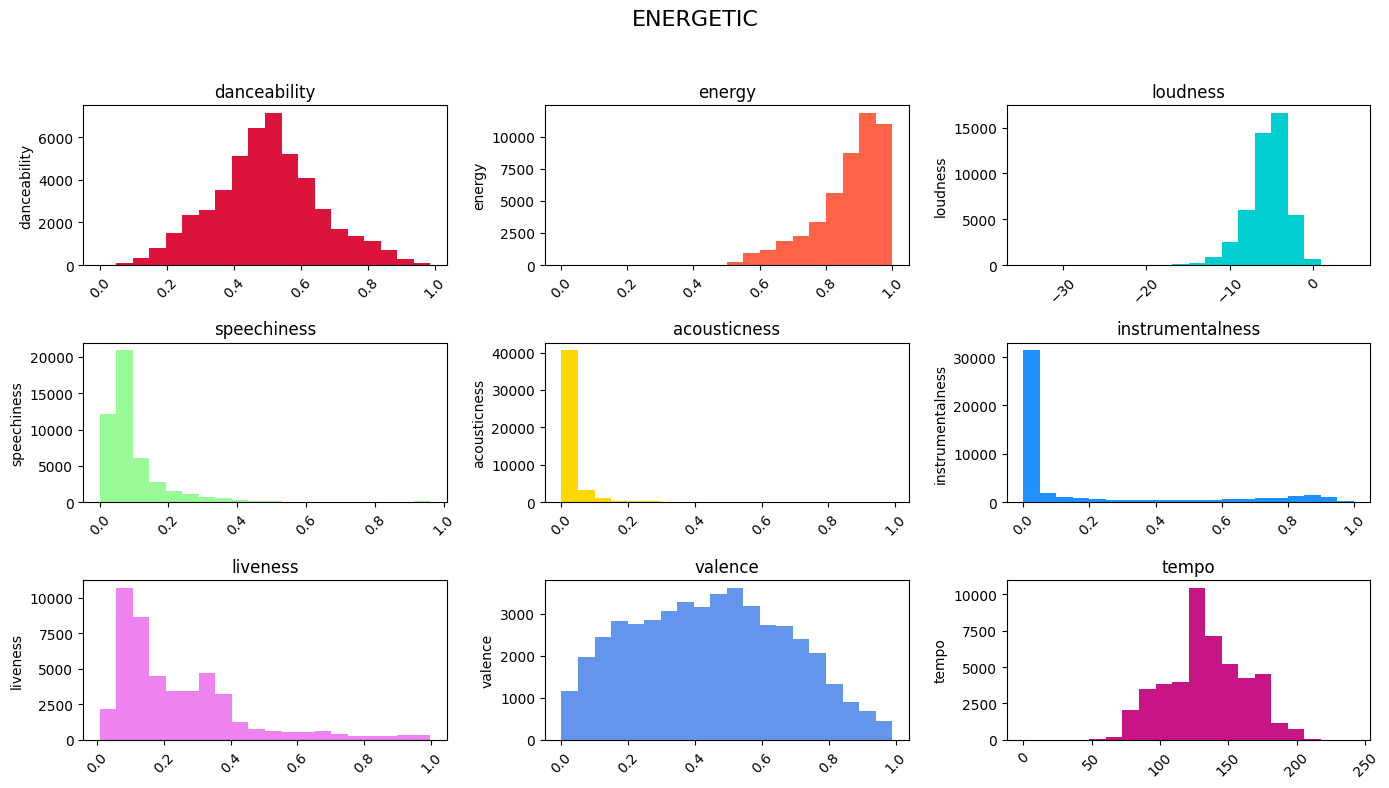

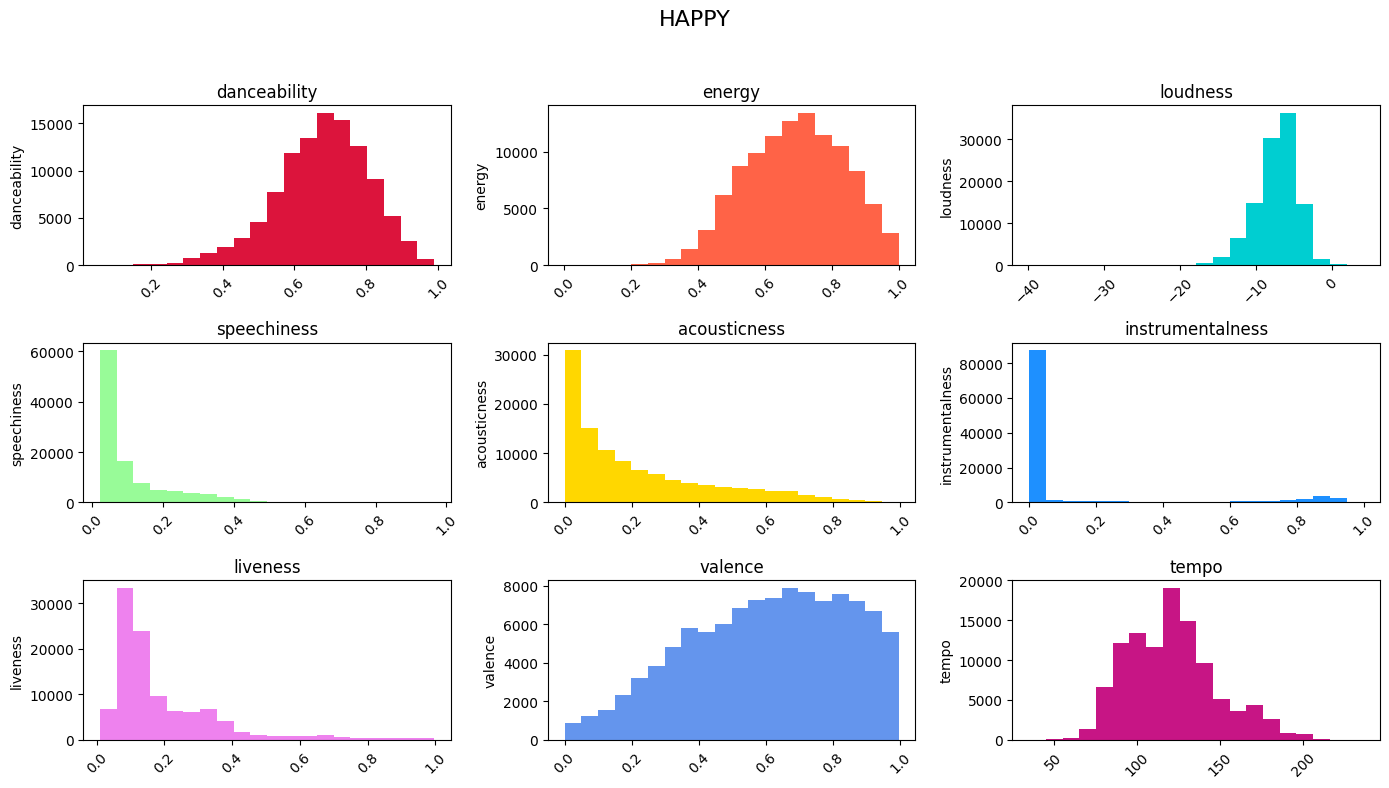

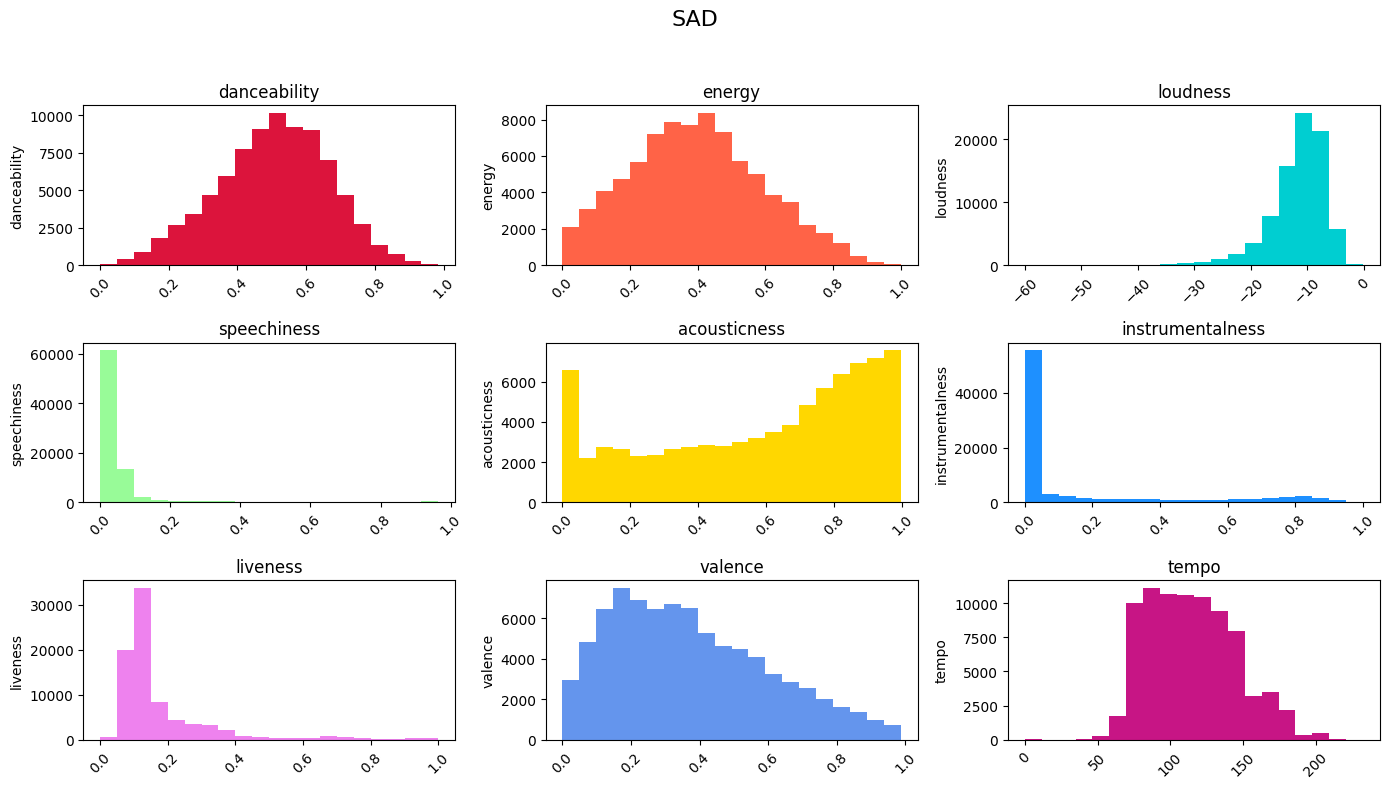

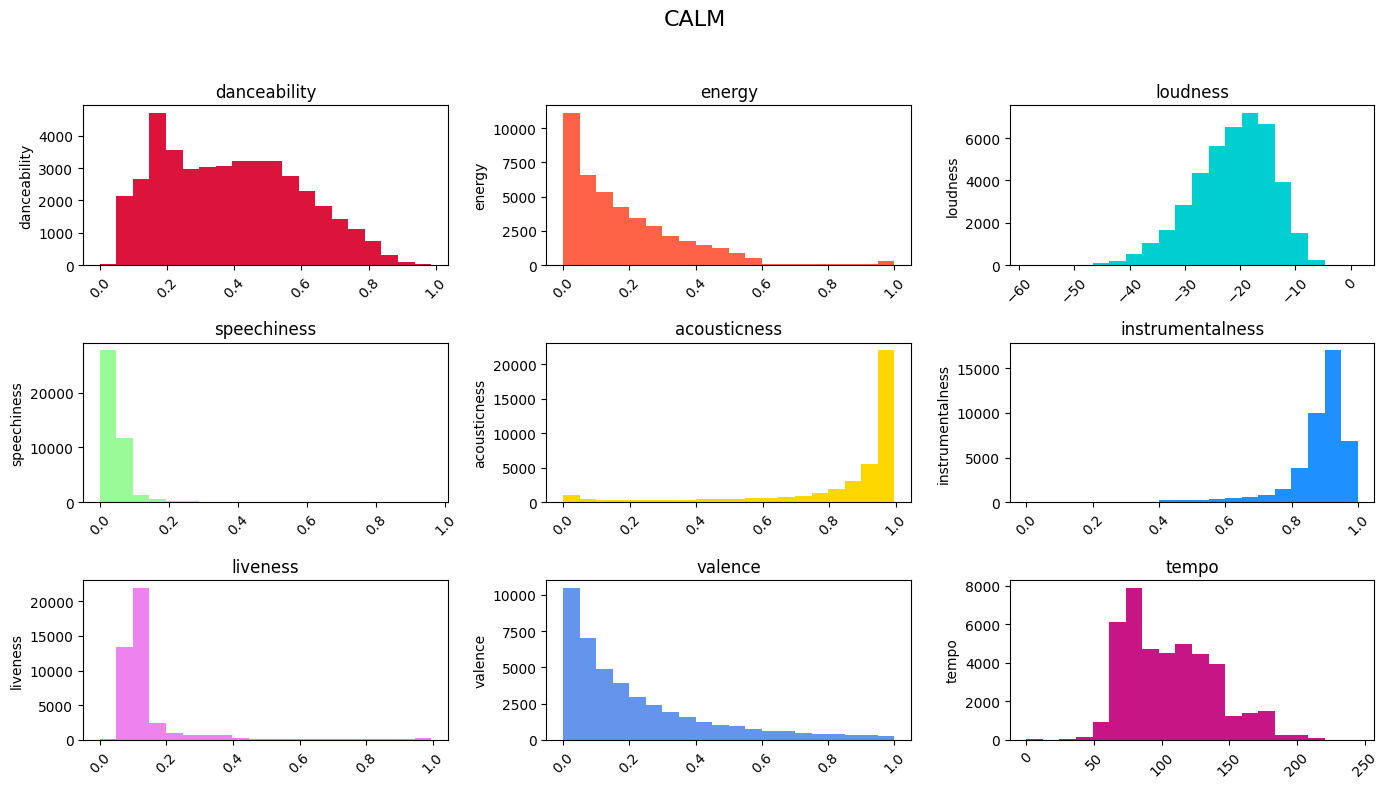

In [54]:
# Para comenzar a clasificar datos, creamos una nueva columna para catgorizar por valores de la mediana
attributes = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(14, 8))

# Creamos una grafica para cada una de las caracteristicas, limitamos el DataFrame a 1000 datos, ya que son bastantes los datos del DataFrame
for i, attribute in enumerate(attributes):
    plt.subplot(3, 3, i + 1)
    plt.bar(df_graphics.index, df_graphics[attribute], color=colors[i])
    plt.title(attribute)
    plt.ylabel(attribute)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Ahora graficamos cada una de las caracteristicas por mood en un solo grafico
for mood in df['mood'].unique():
    plt.figure(figsize=(14, 8))
    for i, attribute in enumerate(attributes):
        plt.subplot(3, 3, i + 1)
        plt.hist(df[df['mood'] == mood][attribute], bins=20, color=colors[i])
        plt.title(attribute)
        plt.ylabel(attribute)
        plt.xticks(rotation=45)
    
    plt.suptitle(mood.upper(), fontsize=16)  # Título principal con el valor de 'mood'
    plt.subplots_adjust(top=0.85)  # Ajusta para que no se superpongan el título y las gráficas
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Deja espacio para el título
    plt.show()



# Modelado de Datos
Para esta sección debemos de hacer una preparación de datos adicional (previo al test), ya que con la información obtenida anteriormente vamos a realizar un modelo que permita determinar si a un usuario le gustará una canción con base en una de sus playlists.

Para esto, vamos a crear datasets con las canciones que le gustan a un usuario y las que no, y vamos a entrenar un modelo de clasificación que nos permita pmediumvioletmediumvioletmediumvioletmediumvioletmediumvioletmediumvioletmediumvioletmediumvioletmediumvioletredecir si a un usuario le gustará una canción o no.

Para la extracción de datos, vamos a utilizar la API de Spotify.

### Parte 1: Extracción de datos de Spotify
Para poder utilizar la API de Spotify, es necesario tener una cuenta de desarrollador y crear una aplicación en la plataforma de Spotify. Para esto, se deben seguir los siguientes pasos:
1. Ingresar a la página de [Spotify for Developers](https://developer.spotify.com/).
2. Iniciar sesión con una cuenta de Spotify.
3. Crear una aplicación en la sección de "Dashboard".
4. Obtener el Client ID y el Client Secret de la aplicación creada.
5. Almacenar el Client ID y el Client Secret en un archivo `credentials.json`.
6. Guardar de igual manera los URI de las playlists que se van a utilizar en el archivo `playlists.json`.



[STEP 1] Setup de Spotify API
Verificando credenciales: 54587eddcc4e42fc880881d3b9b6d56e 7ed2d7eafd524513935ff1fb8a0de0e1


index                                                uri   like
0      0  spotify:user:cari02av:spotify:playlist:64i5wye...   True
1      1  spotify:user:cari02av:spotify:playlist:4415OG5...   True
2      2  spotify:user:unknown:spotify:playlist:0T9nYAPF...  False
3      3  spotify:user:unknown:spotify:playlist:3sb9xMhs...  False

[STEP 2] Extrayendo datos de las canciones de la playlist...
URI: spotify:user:unknown:spotify:playlist:0T9nYAPFagy2WRDtzrJmNn
Username: unknown
Playlist ID: 0T9nYAPFagy2WRDtzrJmNn
{'tracks': {'href': 'https://api.spotify.com/v1/playlists/0T9nYAPFagy2WRDtzrJmNn/tracks?offset=0&limit=100&additional_types=track&fields=tracks', 'items': [{'added_at': '2018-01-08T14:19:08Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/21tzcmxhaqjzesnti401bm3um'}, 'href': 'https://api.spotify.com/v1/users/21tzcmxhaqjzesnti401bm3um', 'id': '21tzcmxhaqjzesnti401bm3um', 'type': 'user', 'uri': 'spotify:user:21tzcmxhaqjzesnti401bm3um'}, 'is_local': False, 'primary_color': None, 'track': {'preview_url': None, 'available_markets': ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DK', 'DO', 'DE', 'EC', 'EE', 'SV', 'FI', 'FR', 'GR', 'GT', 'HN', 'HK', 'HU', 'IS', 'IE', 'IT', 'LV', 'LT', 'LU', 'MY', 'MT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'PA', 'PY', 'PE', 'PH', 

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.606   0.911    6    -5.743     0       0.1420       0.31700   
1          0.751   0.528    0    -9.147     1       0.0428       0.63700   
2          0.738   0.927    9    -5.439     1       0.1010       0.23000   
3          0.844   0.717    7    -4.947     1       0.0392       0.00966   
4          0.743   0.858    7    -5.836     1       0.0369       0.14200   
5          0.810   0.960    5    -4.970     1       0.0587       0.06860   
6          0.923   0.768    1    -7.321     1       0.0674       0.11900   
7          0.817   0.809    5    -4.914     1       0.2000       0.07070   
8          0.658   0.466    7    -7.963     1       0.0872       0.24000   
9          0.763   0.886    2    -6.211     1       0.1000       0.10700   
10         0.854   0.848    7    -5.930     1       0.0410       0.23400   
11         0.788   0.715   10    -4.710     1       0.0919       0.39300   
12         0.817   0.918    9    -4.960     1       0.0662       0.25700   
13         0.746   0.915    7    -6.626     0       0.0675       0.50500   
14         0.838   0.881    7    -6.453     0       0.0491       0.11300   
15         0.752   0.898    5    -6.828     1       0.0572       0.33900   
16         0.834   0.860    2    -5.094     1       0.0490       0.09290   
17         0.832   0.628    2    -6.203     0       0.0367       0.35300   
18         0.818   0.774    8    -7.895     1       0.0430       0.20000   
19         0.639   0.880    7    -4.957     1       0.2240       0.06480   
20         0.719   0.673    7    -7.184     0       0.0347       0.41400   
21         0.895   0.677    6    -7.195     0       0.0446       0.15000   
22         0.846   0.850    6    -5.707     1       0.0509       0.16200   
23         0.814   0.639    0   -10.481     1       0.0409       0.10700   
24         0.654   0.781    7    -4.698     1       0.0312       0.73600   
25         0.921   0.555   10    -8.668     1       0.1020       0.13800   
26         0.562   0.595    9   -12.875     1       0.0770       0.18100   
27         0.711   0.994   11    -4.576     0       0.0728       0.21000   
28         0.659   0.687    0    -4.911     1       0.0776       0.12800   
29         0.728   0.938    7    -7.844     1       0.0770       0.07210   
30         0.787   0.881   11    -4.281     1       0.1560       0.26900   
31         0.834   0.775    0    -6.144     0       0.1800       0.00694   
32         0.917   0.603    9    -6.576     1       0.0567       0.11300   
33         0.661   0.916    0   -10.685     1       0.0976       0.46600   
34         0.826   0.682    3    -6.884     1       0.0728       0.71300   
35         0.704   0.879    7    -3.412     1       0.0402       0.31300   
36         0.713   0.763   10    -7.638     1       0.0422       0.33900   
37         0.841   0.880   11   -11.386     1       0.0684       0.21300   
38         0.800   0.665    5    -8.185     1       0.0469       0.04280   
39         0.565   0.709    8    -7.438     0       0.0464       0.06450   
40         0.841   0.860    1    -8.915     0       0.0394       0.17300   
41         0.861   0.764    5    -7.856     1       0.0495       0.25300   
42         0.789   0.778   10    -5.688     1       0.0410       0.46900   
43         0.794   0.831    8    -9.235     1       0.3310       0.01350   
44         0.715   0.889    1    -6.300     0       0.0721       0.00454   
45         0.869   0.592    7    -4.530     1       0.0713       0.12600   
46         0.783   0.799   10    -6.979     0       0.0897       0.03590   
47         0.746   0.799    7    -6.030     1       0.0378       0.44900   
48         0.908   0.747    9    -6.182     1       0.0350       0.05740   
49         0.871   0.861   10    -5.810     0       0.2830       0.00698   
50         0.881   0.703   11    -7.770     1       0.0713       0.24000   
51         0.830   0.868    7    -3.780     1       

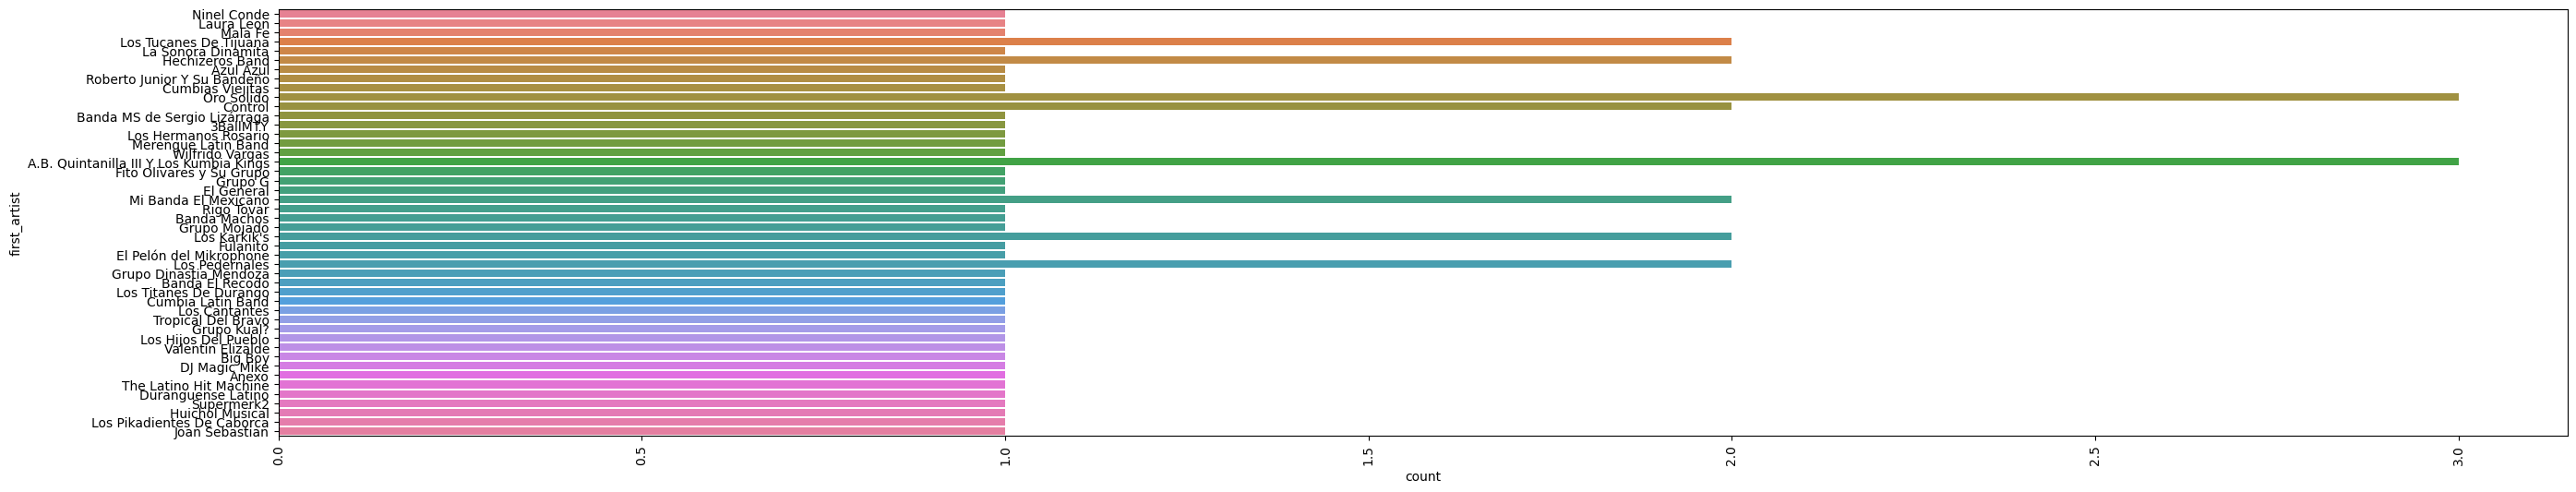

id                 title  danceability  energy  key  \
0  4WXP5uP1Ugp8aEIVpNRk5g     El Bombón Asesino         0.606   0.911    6   
1  09f8vU5alUL2QmIZMlCQ6A  Suavecito, Suavecito         0.751   0.528    0   
2  7neWp4incUBLP1XQTNWmP0               La Vaca         0.738   0.927    9   
3  79xkyiTBHqdGg3SirACPwy              La Chona         0.844   0.717    7   
4  2cUKBUN66IsL9lc8PdISQY               Mi Cucu         0.743   0.858    7   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.743     0       0.31700          0.000000     0.277    0.836   85.391   
1    -9.147     1       0.63700          0.000000     0.060    0.899   96.272   
2    -5.439     1       0.23000          0.005150     0.684    0.665  170.011   
3    -4.947     1       0.00966          0.000000     0.344    0.965  145.065   
4    -5.836     1       0.14200          0.000006     0.311    0.917  104.815   

   duration_ms  time_signature  
0       192547               4  
1       226150               4  
2       255533               4  
3       199080               4  
4       234707               4

[STEP 6] Guardando los datos...
Index(['uri', 'like'], dtype='object')
Index([0, 1], dtype='int64', name='index')


id                 title  danceability  energy  key  \
0  4WXP5uP1Ugp8aEIVpNRk5g     El Bombón Asesino         0.606   0.911    6   
1  09f8vU5alUL2QmIZMlCQ6A  Suavecito, Suavecito         0.751   0.528    0   
2  7neWp4incUBLP1XQTNWmP0               La Vaca         0.738   0.927    9   
3  79xkyiTBHqdGg3SirACPwy              La Chona         0.844   0.717    7   
4  2cUKBUN66IsL9lc8PdISQY               Mi Cucu         0.743   0.858    7   

   loudness  mode  acousticness  instrumentalness  liveness  valence    tempo  \
0    -5.743     0       0.31700          0.000000     0.277    0.836   85.391   
1    -9.147     1       0.63700          0.000000     0.060    0.899   96.272   
2    -5.439     1       0.23000          0.005150     0.684    0.665  170.011   
3    -4.947     1       0.00966          0.000000     0.344    0.965  145.065   
4    -5.836     1       0.14200          0.000006     0.311    0.917  104.815   

   duration_ms  time_signature  class  
0       192547               4      0  
1       226150               4      0  
2       255533               4      0  
3       199080               4      0  
4       234707               4      0

In [55]:
# Extracción de datos de la API de Spotify
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import os

print("[STEP 1] Setup de Spotify API")

credentials = pd.read_json('credentials.json')
client_id = credentials['client_id'].iloc[0]
client_secret = credentials['client_secret'].iloc[0]

print(f"Verificando credenciales: {client_id} {client_secret}")

playlists = pd.read_json('playlists.json')
playlists = pd.DataFrame(playlists)

display(playlists)

playlists.set_index("index", inplace=True)

playlist_index = 2

# Separamos las URIs de las playlists
playlists_uris = playlists['uri']
# Separamos las playlists que nos gustan
like = playlists[playlists['like'] == True]

# Creamos un objeto de Spotify
client_credentials_manager = spotipy.oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


print("[STEP 2] Extrayendo datos de las canciones de la playlist...")
uri = playlists_uris.iloc[playlist_index]    # the URI is split by ':' to get the username and playlist ID
print(f"URI: {uri}")

username = uri.split(':')[2]
playlist_id = uri.split(':')[5]

print(f"Username: {username}")
print(f"Playlist ID: {playlist_id}")

# Obtenemos los datos de la playlist
results = sp.user_playlist(username, playlist_id, 'tracks')

# Obtenemos los datos de la playlist
print(results)

print("[STEP 3] Extrayendo datos de las canciones de la playlist...")

# Almacenamos los datos de las canciones
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

# Iteramos sobre las canciones de la playlist para obtener los datos
for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

print("[STEP 4] Extrayendo características de las canciones...")

# Obtenemos las caracteristicas de las canciones
features = sp.audio_features(playlist_tracks_id)

import numpy as np
import pandas as pd

features_df = pd.DataFrame(data=features, columns=features[0].keys())

print("[STEP 5] Uniendo los datos de las canciones...")

print("Playlist antes de unir los datos:")
display(features_df)

# Unimos los datos de las canciones
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.head()

plt.figure(figsize=(32,6))
sns.countplot(features_df['first_artist'], palette='husl')
plt.xticks(rotation=90)
plt.show()

features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)
display(features_df.head())

print("[STEP 6] Guardando los datos...")

# print([like['index'] == playlist_index])

# Print columns 
print(like.columns)

# Get indexes of playlists that we like
print(like.index)
type(like.index)

if playlist_index in like.index:
    features_df['class'] = np.ones((len(features_df), 1), dtype=int)
else:
    features_df['class'] = np.zeros((len(features_df), 1), dtype=int)

display(features_df.head())

filename = os.path.join('playlist_data', 'playlist' + str(playlist_index) + '.json')

# Save the DataFrame as JSON
features_df.to_json(filename)
features_df.to_json(filename)

### Parte 2: Exploración de Datos de la playlist
Luego de haber obtenido los datos de las playlists, vamos a explorar los datos para determinar cuáles son las características que vamos a utilizar para el modelo de clasificación.

[STEP 1] Setup de Spotify API


danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.485   0.638    2    -6.962     0        0.3090          0.000041   
1         0.628   0.825    0    -4.789     1        0.0455          0.136000   
2         0.393   0.575   10    -8.041     1        0.1200          0.000196   
3         0.570   0.892   11    -5.814     1        0.0867          0.000009   
4         0.768   0.755    0    -6.509     1        0.1650          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  class  
0     0.137    0.421  149.990       203482               4      1  
1     0.346    0.387  163.100       163389               4      1  
2     0.390    0.169  112.371       275226               4      1  
3     0.263    0.520   94.933       202500               4      1  
4     0.187    0.868  100.003       190376               4      1

danceability      energy         key    loudness        mode  \
count    286.000000  286.000000  286.000000  286.000000  286.000000   
mean       0.722413    0.687280    5.503497   -6.183825    0.590909   
std        0.116835    0.138324    3.600924    2.020217    0.492528   
min        0.253000    0.267000    0.000000  -16.158000    0.000000   
25%        0.659500    0.592000    2.000000   -7.205500    0.000000   
50%        0.749000    0.690000    6.000000   -5.964000    1.000000   
75%        0.806750    0.788500    9.000000   -4.941000    1.000000   
max        0.923000    0.994000   11.000000   -1.971000    1.000000   

       acousticness  instrumentalness    liveness     valence       tempo  \
count    286.000000        286.000000  286.000000  286.000000  286.000000   
mean       0.227378          0.027760    0.178717    0.553969  125.392909   
std        0.193632          0.115737    0.150172    0.257910   26.085311   
min        0.000783          0.000000    0.024300    0.045100   75.995000   
25%        0.068300          0.000000    0.090825    0.347500  104.998750   
50%        0.179500          0.000003    0.118000    0.537500  125.880000   
75%        0.320000          0.000927    0.202750    0.764000  142.072500   
max        0.770000          0.879000    0.799000    0.981000  205.059000   

         duration_ms  time_signature       class  
count     286.000000      286.000000  286.000000  
mean   241122.017483        3.979021    0.454545  
std     66297.659828        0.166218    0.498802  
min    123960.000000        3.000000    0.000000  
25%    199759.750000        4.000000    0.000000  
50%    226691.000000        4.000000    0.000000  
75%    265802.500000        4.000000    1.000000  
max    512637.000000        5.000000    1.000000

[STEP 2] Data Plotting


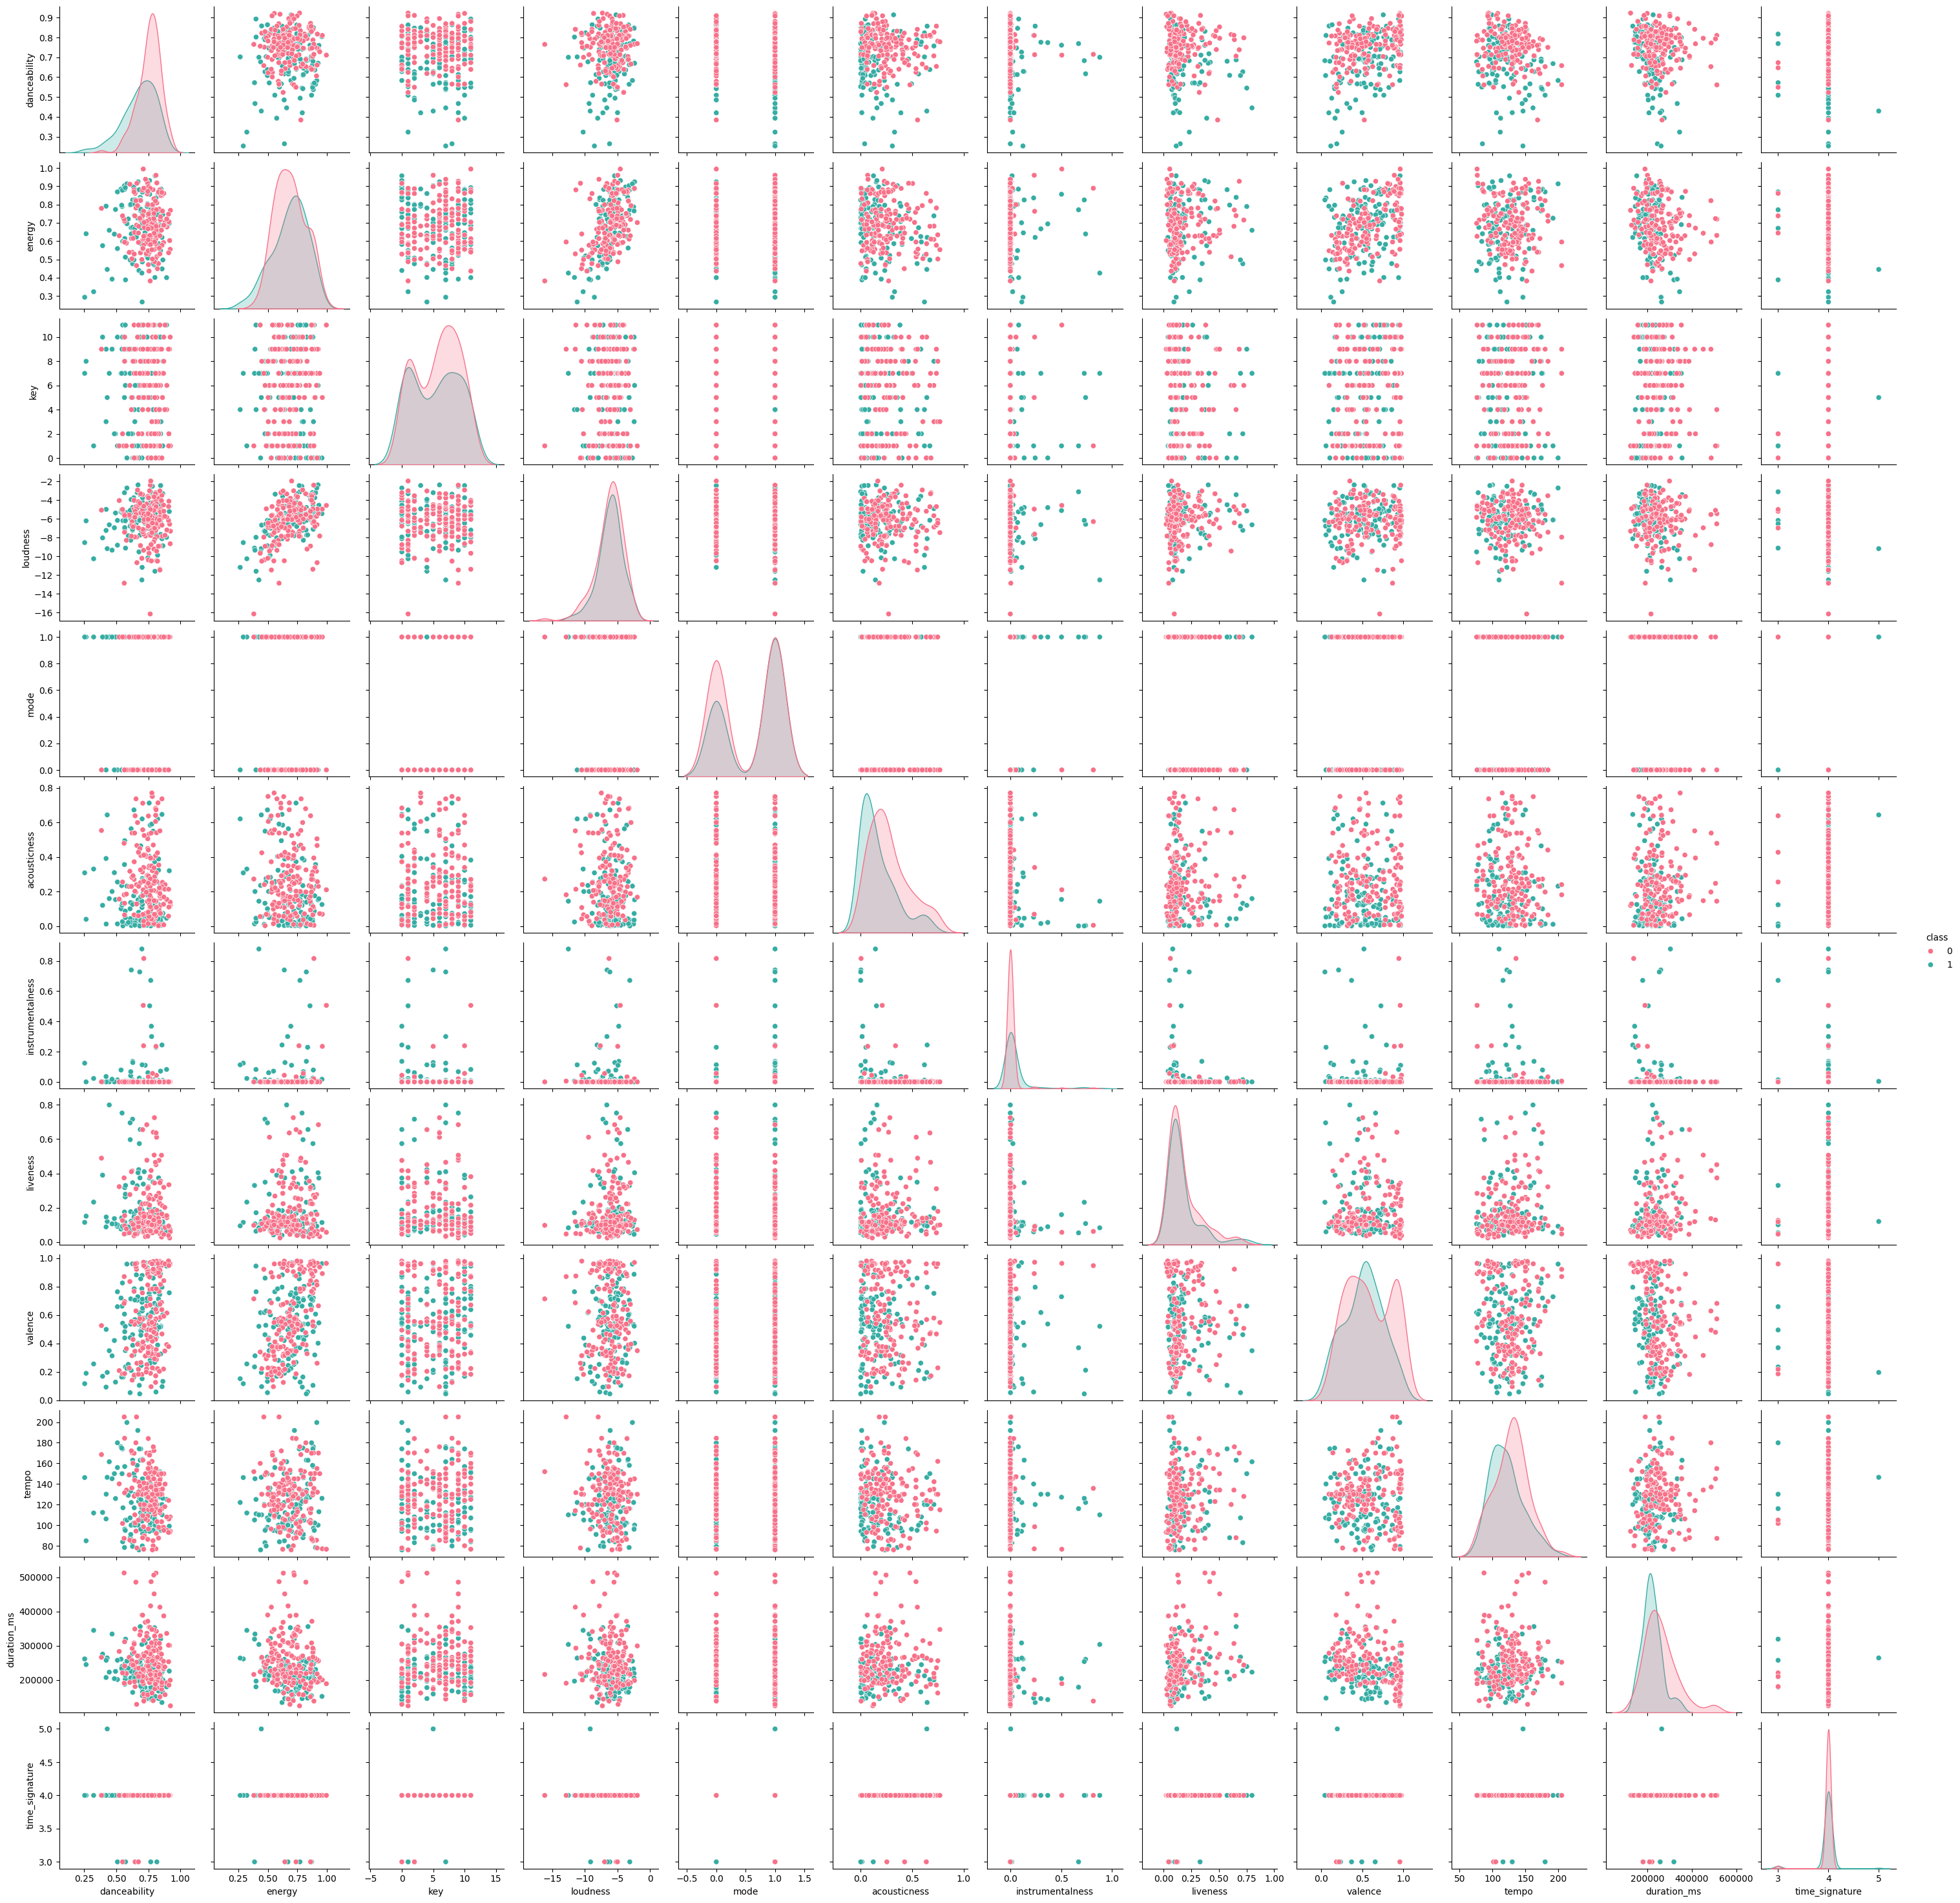

In [56]:
print("[STEP 1] Setup de Spotify API")

import os
df_list = []
for i in range(0,4):
    filename = os.path.join("playlist_data", f"playlist{i}.json")
    try:
        df_list.append(pd.read_json(filename))
    except FileNotFoundError:
        print(f"File {filename} does not exist.")
        continue

songs = pd.concat(df_list)
songs = songs.reset_index()
songs.head()

songs = songs.drop_duplicates()
songs = songs.drop('index', axis=1)
songs = songs.drop(['id', 'title'], axis=1)

display(songs.head())
display(songs.describe())

print("[STEP 2] Data Plotting")

sns.pairplot(data=songs, hue='class', palette='husl')
plt.show()


class
0    156
1    130
Name: count, dtype: int64


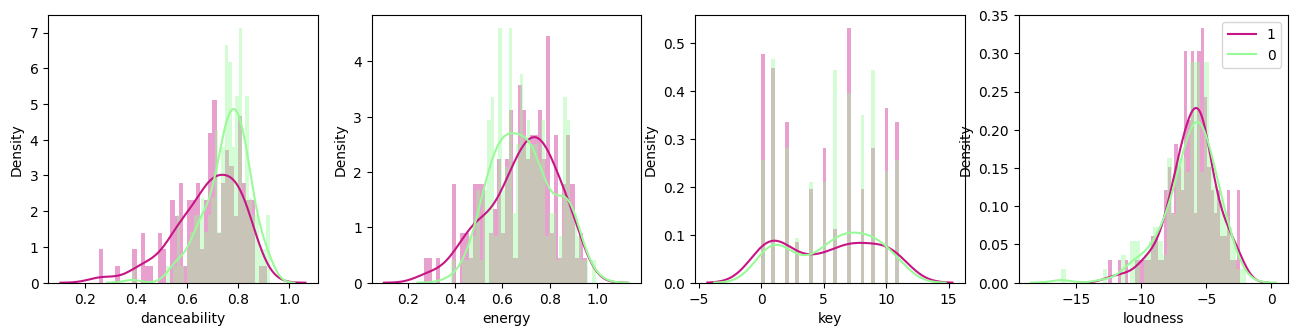

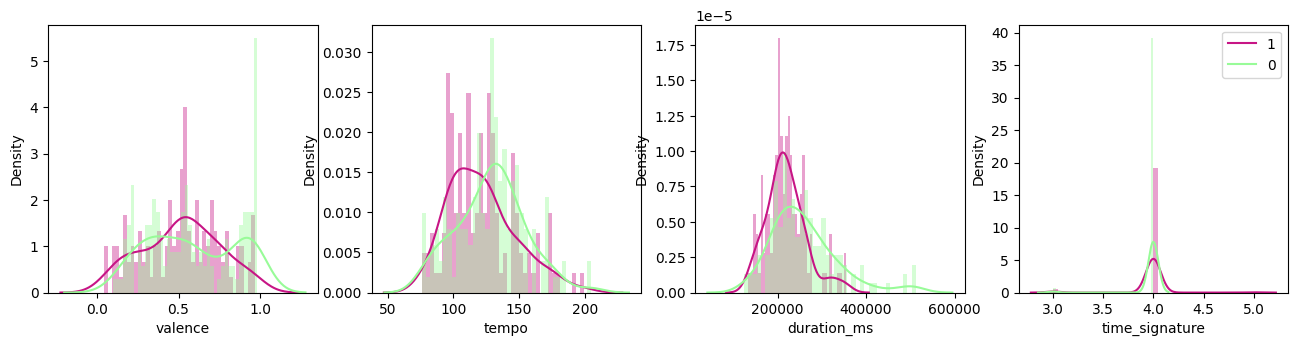

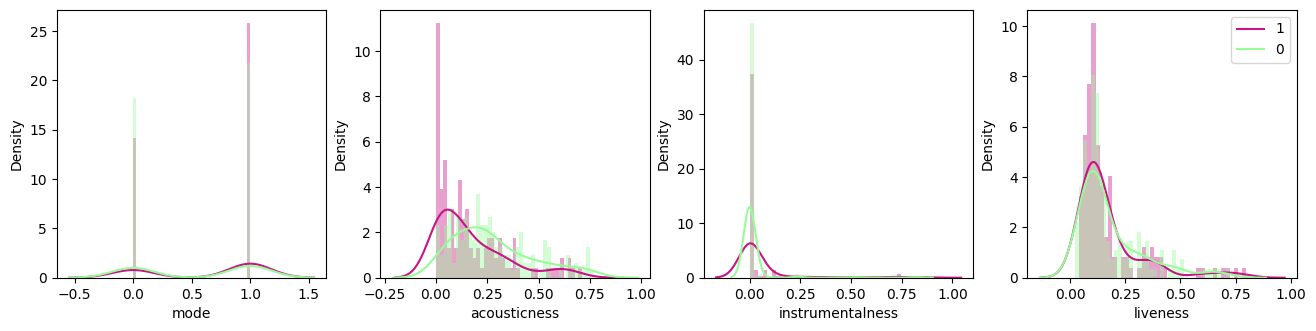

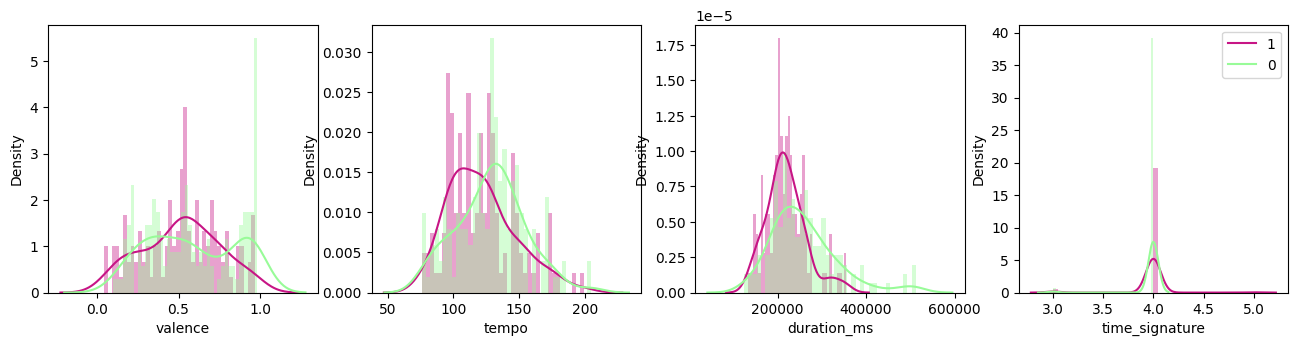

In [ ]:
print(songs['class'].value_counts())


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['danceability'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['danceability'], color='palegreen', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['energy'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['energy'], color='palegreen', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['key'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['key'], color='palegreen', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['loudness'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['loudness'], color='palegreen', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['valence'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['valence'], color='palegreen', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['tempo'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['tempo'], color='palegreen', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['duration_ms'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['duration_ms'], color='palegreen', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['time_signature'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['time_signature'], color='palegreen', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['mode'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['mode'], color='palegreen', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['acousticness'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['acousticness'], color='palegreen', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['instrumentalness'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['instrumentalness'], color='palegreen', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['liveness'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['liveness'], color='palegreen', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(songs[songs['class']==1]['valence'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['valence'], color='palegreen', bins=40)
plt.subplot(4,4,2)
sns.distplot(songs[songs['class']==1]['tempo'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['tempo'], color='palegreen', bins=40)
plt.subplot(4,4,3)
sns.distplot(songs[songs['class']==1]['duration_ms'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['duration_ms'], color='palegreen', bins=40)
plt.subplot(4,4,4)
sns.distplot(songs[songs['class']==1]['time_signature'], color='mediumvioletred', bins=40)
sns.distplot(songs[songs['class']==0]['time_signature'], color='palegreen', bins=40)
plt.legend((1,0))


### Parte 3: Modelos de Machine Learning

Para realizar nuestro proyecto, hemos decidido utilizar los modelos de `kNN` y `Arboles de decisión` de clasificación de Machine Learning. Para esto, vamos a utilizar la librería `scikit-learn` de Python.

In [ ]:



X = songs.drop('class', axis=1)
y = songs['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ModuleNotFoundError: No module named 'sklearn'